# Outlier removal
#### Mickey MacKie, Stanford Radio Glaciology

In this script, we use the Local Outlier Factor (LOF) outlier detection method to remove conflicting data near crossovers.

In [1]:
# load dependencies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.neighbors import LocalOutlierFactor
  
import geostatspy.geostats as geostats 

## Load and plot data

Load in bed topography measurements from a 60 x 60 km$^2$ sample area covering part of Nioghalvfjerdsfjorden in Greenland. We use radar bed picks from CReSIS and exposed topography from BedMachine Greenland. The coordinates are polar stereographic coordinates.

<function matplotlib.pyplot.show(*args, **kw)>

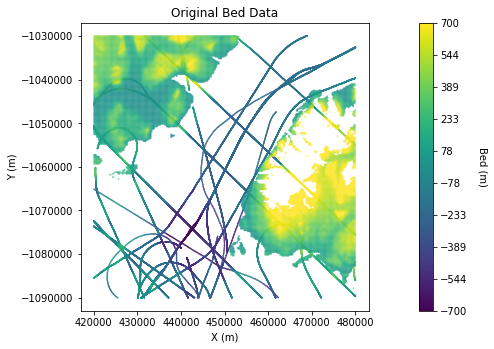

In [2]:
df_bed = pd.read_csv('Data/Nioghalvfjerds_bed_data.csv') # download data

# plot original data
im = plt.scatter(df_bed['X'],df_bed['Y'], c = df_bed['Bed'], vmin = -700, vmax = 700, marker=".", s = 0.5) # scatter plot for location map
plt.title('Original Bed Data')                                    # add plot title
plt.xlabel('X (m)'); plt.ylabel('Y (m)')                          # set axis labels
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-700, 700, 10)) # add vertical color bar
cbar.set_label("Bed (m)", rotation=270, labelpad=20)      # add labels to the color bar
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0) # adjust the plot size
plt.axis('scaled')
plt.show

Notice there are some crossover errors and erroneous data. We'll deal with the crossover errors using the Local Outlier Factor method

In [3]:
# determine Local Outlier Factor
clf = LocalOutlierFactor(n_neighbors = 5, contamination = 0.05) # we recommend using n = 5, depending on data density
clf.fit_predict(df_bed)
lof = clf.negative_outlier_factor_

<function matplotlib.pyplot.show(*args, **kw)>

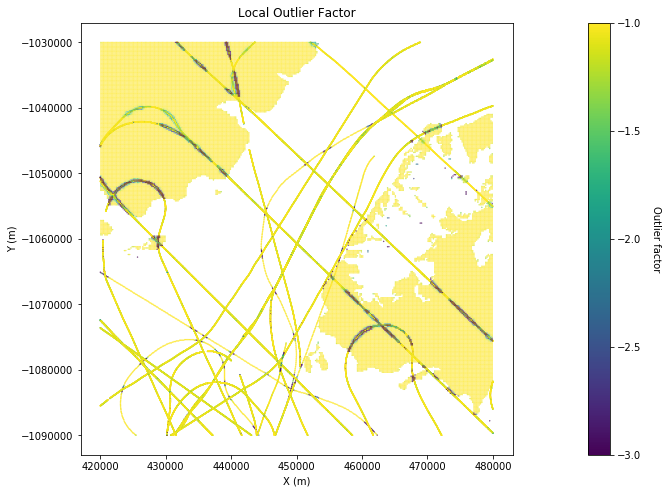

In [4]:
# plot outlier factors
im = plt.scatter(df_bed['X'],df_bed['Y'], c = lof, vmin = -3, vmax = -1, marker=".", s = 0.5) # scatter plot for location map
plt.title('Local Outlier Factor')                                    # add plot title
plt.xlabel('X (m)'); plt.ylabel('Y (m)')                          # set axis labels
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-3, -1, 5)) # add vertical color bar
cbar.set_label("Outlier factor", rotation=270, labelpad=20)      # add labels to the color bar
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5) # adjust the plot size
plt.axis('scaled')
plt.show

Let's remove data with a LOF less than -1.3

In [5]:
df_bed = df_bed[lof >= -1.3]

<function matplotlib.pyplot.show(*args, **kw)>

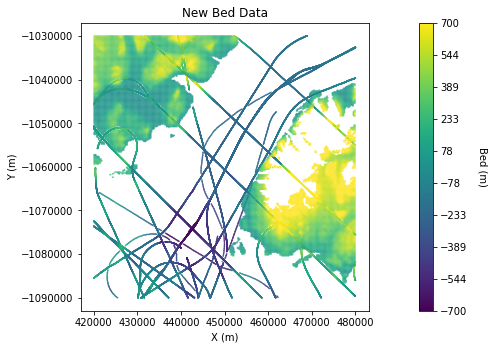

In [6]:
# plot cleaned data
im = plt.scatter(df_bed['X'],df_bed['Y'], c = df_bed['Bed'], vmin = -700, vmax = 700, marker=".", s = 0.5) # scatter plot for location map
plt.title('New Bed Data')                                    # add plot title
plt.xlabel('X (m)'); plt.ylabel('Y (m)')                          # set axis labels
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-700, 700, 10)) # add vertical color bar
cbar.set_label("Bed (m)", rotation=270, labelpad=20)      # add labels to the color bar
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0) # adjust the plot size
plt.axis('scaled')
plt.show